In [1]:
## Required Packages

In [2]:
import pandas as pd
import numpy as np
import sklearn as sklearn
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import chi2

In [3]:
## Get the Data

In [4]:
a = pd.read_csv('train-2.csv')
a

,Flight_ID,Airline,Departure_City,Arrival_City,Distance,Departure_Time,Arrival_Time,Duration,Aircraft_Type,Number_of_Stops,Day_of_Week,Month_of_Travel,Holiday_Season,Demand,Weather_Conditions,Passenger_Count,Promotion_Type,Fuel_Price,Flight_Price
0,F1,Airline B,NaN,Greenshire,8286.0,8:23,20:19,11.94,Boeing 787,0,Wednesday,December,Summer,Low,Rain,240,Special Offer,0.91,643.93
1,F2,Airline C,Leonardland,New Stephen,2942.0,20:28,1:45,5.29,Airbus A320,0,Wednesday,March,Spring,Low,Rain,107,NaN,1.08,423.13
2,F3,Airline B,South Dylanville,Port Ambermouth,2468.0,11:30,15:54,4.41,Boeing 787,1,Sunday,September,Summer,High,Cloudy,131,NaN,0.52,442.17
3,F4,NaN,Blakefort,Crosbyberg,3145.0,20:24,1:21,4.96,Boeing 787,0,Sunday,February,Fall,Low,Cloudy,170,Discount,0.71,394.42
4,F5,Airline B,Michaelport,Onealborough,5558.0,21:59,6:04,8.09,Boeing 737,1,Thursday,January,NaN,NaN,Clear,181,NaN,1.09,804.35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,F44996,Airline B,Port Donaldland,Maryshire,3884.0,21:49,3:31,5.70,Boeing 787,1,Sunday,May,Fall,Low,Clear,263,Discount,0.69,417.18
44996,F44997,Airline A,East Patriciafurt,East Vickiberg,9191.0,22:50,11:48,12.97,Airbus A320,1,Friday,December,Fall,Low,Snow,168,Discount,0.74,687.03
44997,F44998,Airline C,Monicaton,West Johnburgh,6757.0,2:33,11:21,8.81,Boeing 777,1,Wednesday,October,Fall,Low,Snow,244,Special Offer,0.83,547.39
44998,F44999,Airline B,Turnerburgh,Gabrielville,3587.0,13:25,19:37,6.21,Boeing 737,0,Saturday,June,NaN,Medium,Cloudy,121,Special Offer,0.60,487.67


In [5]:
## Copy the data

In [6]:
data = a.copy()
data

,Flight_ID,Airline,Departure_City,Arrival_City,Distance,Departure_Time,Arrival_Time,Duration,Aircraft_Type,Number_of_Stops,Day_of_Week,Month_of_Travel,Holiday_Season,Demand,Weather_Conditions,Passenger_Count,Promotion_Type,Fuel_Price,Flight_Price
0,F1,Airline B,NaN,Greenshire,8286.0,8:23,20:19,11.94,Boeing 787,0,Wednesday,December,Summer,Low,Rain,240,Special Offer,0.91,643.93
1,F2,Airline C,Leonardland,New Stephen,2942.0,20:28,1:45,5.29,Airbus A320,0,Wednesday,March,Spring,Low,Rain,107,NaN,1.08,423.13
2,F3,Airline B,South Dylanville,Port Ambermouth,2468.0,11:30,15:54,4.41,Boeing 787,1,Sunday,September,Summer,High,Cloudy,131,NaN,0.52,442.17
3,F4,NaN,Blakefort,Crosbyberg,3145.0,20:24,1:21,4.96,Boeing 787,0,Sunday,February,Fall,Low,Cloudy,170,Discount,0.71,394.42
4,F5,Airline B,Michaelport,Onealborough,5558.0,21:59,6:04,8.09,Boeing 737,1,Thursday,January,NaN,NaN,Clear,181,NaN,1.09,804.35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,F44996,Airline B,Port Donaldland,Maryshire,3884.0,21:49,3:31,5.70,Boeing 787,1,Sunday,May,Fall,Low,Clear,263,Discount,0.69,417.18
44996,F44997,Airline A,East Patriciafurt,East Vickiberg,9191.0,22:50,11:48,12.97,Airbus A320,1,Friday,December,Fall,Low,Snow,168,Discount,0.74,687.03
44997,F44998,Airline C,Monicaton,West Johnburgh,6757.0,2:33,11:21,8.81,Boeing 777,1,Wednesday,October,Fall,Low,Snow,244,Special Offer,0.83,547.39
44998,F44999,Airline B,Turnerburgh,Gabrielville,3587.0,13:25,19:37,6.21,Boeing 737,0,Saturday,June,NaN,Medium,Cloudy,121,Special Offer,0.60,487.67


In [7]:
## Quick Look at the DataFrame

In [8]:
# Display the First Few Rows
data.head()

,Flight_ID,Airline,Departure_City,Arrival_City,Distance,Departure_Time,Arrival_Time,Duration,Aircraft_Type,Number_of_Stops,Day_of_Week,Month_of_Travel,Holiday_Season,Demand,Weather_Conditions,Passenger_Count,Promotion_Type,Fuel_Price,Flight_Price
0,F1,Airline B,NaN,Greenshire,8286.0,8:23,20:19,11.94,Boeing 787,0,Wednesday,December,Summer,Low,Rain,240,Special Offer,0.91,643.93
1,F2,Airline C,Leonardland,New Stephen,2942.0,20:28,1:45,5.29,Airbus A320,0,Wednesday,March,Spring,Low,Rain,107,NaN,1.08,423.13
2,F3,Airline B,South Dylanville,Port Ambermouth,2468.0,11:30,15:54,4.41,Boeing 787,1,Sunday,September,Summer,High,Cloudy,131,NaN,0.52,442.17
3,F4,NaN,Blakefort,Crosbyberg,3145.0,20:24,1:21,4.96,Boeing 787,0,Sunday,February,Fall,Low,Cloudy,170,Discount,0.71,394.42
4,F5,Airline B,Michaelport,Onealborough,5558.0,21:59,6:04,8.09,Boeing 737,1,Thursday,January,NaN,NaN,Clear,181,NaN,1.09,804.35


In [9]:
# Display the Last Few Rows
data.tail()

,Flight_ID,Airline,Departure_City,Arrival_City,Distance,Departure_Time,Arrival_Time,Duration,Aircraft_Type,Number_of_Stops,Day_of_Week,Month_of_Travel,Holiday_Season,Demand,Weather_Conditions,Passenger_Count,Promotion_Type,Fuel_Price,Flight_Price
44995,F44996,Airline B,Port Donaldland,Maryshire,3884.0,21:49,3:31,5.70,Boeing 787,1,Sunday,May,Fall,Low,Clear,263,Discount,0.69,417.18
44996,F44997,Airline A,East Patriciafurt,East Vickiberg,9191.0,22:50,11:48,12.97,Airbus A320,1,Friday,December,Fall,Low,Snow,168,Discount,0.74,687.03
44997,F44998,Airline C,Monicaton,West Johnburgh,6757.0,2:33,11:21,8.81,Boeing 777,1,Wednesday,October,Fall,Low,Snow,244,Special Offer,0.83,547.39
44998,F44999,Airline B,Turnerburgh,Gabrielville,3587.0,13:25,19:37,6.21,Boeing 737,0,Saturday,June,NaN,Medium,Cloudy,121,Special Offer,0.60,487.67
44999,F45000,Airline B,Harrisport,Chelsealand,4890.0,3:37,11:19,7.70,Airbus A320,0,Monday,December,Winter,Low,Rain,91,NaN,0.95,532.92


In [10]:
# Check For Duplicate Rows
duplicates = data[data.duplicated()]
duplicates

,Flight_ID,Airline,Departure_City,Arrival_City,Distance,Departure_Time,Arrival_Time,Duration,Aircraft_Type,Number_of_Stops,Day_of_Week,Month_of_Travel,Holiday_Season,Demand,Weather_Conditions,Passenger_Count,Promotion_Type,Fuel_Price,Flight_Price


In [11]:
# Check the Null Values from the DataFrame
data.isnull().sum()

Flight_ID                 0
Airline                3573
Departure_City          340
Arrival_City            186
Distance                 91
Departure_Time            0
Arrival_Time              0
Duration                  0
Aircraft_Type            43
Number_of_Stops           0
Day_of_Week             225
Month_of_Travel         267
Holiday_Season         9020
Demand                  317
Weather_Conditions      302
Passenger_Count           0
Promotion_Type        15215
Fuel_Price               90
Flight_Price              0
dtype: int64

In [12]:
# Percentage of Missing Values in the DataFrame
percent_missing = data.isnull().sum()*100/len(data)
missing_values = pd.DataFrame({'percent_missing': percent_missing})
missing_values.sort_values(by ='percent_missing', ascending = False)

,percent_missing
Promotion_Type,33.811111
Holiday_Season,20.044444
Airline,7.940000
Departure_City,0.755556
Demand,0.704444
Weather_Conditions,0.671111
Month_of_Travel,0.593333
Day_of_Week,0.500000
Arrival_City,0.413333
Distance,0.202222


In [13]:
# Import the Missing Value in the DataFrame
# For Airline
data['Airline'].fillna(data['Airline'].mode()[0], inplace=True)
# For Aircraft_Type
data['Aircraft_Type'].fillna(data['Aircraft_Type'].mode()[0], inplace=True)
# For Distance
data['Distance'].fillna(data['Distance'].median(),inplace=True)
# For Day_of_Week
data['Day_of_Week'].fillna(data['Day_of_Week'].mode()[0], inplace=True)
# For Month_of_Travel
data['Month_of_Travel'].fillna(data['Month_of_Travel'].mode()[0], inplace=True)
# For Demand
data['Demand'].fillna(data['Demand'].mode()[0], inplace=True)
# For Promotion_Type
data['Promotion_Type'].fillna(data['Promotion_Type'].mode()[0], inplace=True)
# For Weather_Conditions
data['Weather_Conditions'].fillna(data['Weather_Conditions'].mode()[0], inplace=True)
# For Fuel_Price
data['Fuel_Price'].fillna(data['Fuel_Price'].median(),inplace=True)
# For Holiday_Season
data['Holiday_Season'].fillna(data['Holiday_Season'].mode()[0], inplace=True)


In [14]:
# Remove the Missing Values in DataFrame
# For Departure_city and Arrival_City
data.dropna(subset=["Departure_City", "Arrival_City"], inplace=True)

In [15]:
# Check for the Column Present
column_names = np.array(data.columns)
print(column_names)

['Flight_ID' 'Airline' 'Departure_City' 'Arrival_City' 'Distance'
 'Departure_Time' 'Arrival_Time' 'Duration' 'Aircraft_Type'
 'Number_of_Stops' 'Day_of_Week' 'Month_of_Travel' 'Holiday_Season'
 'Demand' 'Weather_Conditions' 'Passenger_Count' 'Promotion_Type'
 'Fuel_Price' 'Flight_Price']


In [16]:
# Unique Value Counts in DataFrame
data['Flight_ID'].value_counts()

Flight_ID
F2        1
F30025    1
F30017    1
F30018    1
F30019    1
         ..
F15042    1
F15043    1
F15044    1
F15045    1
F45000    1
Name: count, Length: 44476, dtype: int64

In [17]:
data['Airline'].value_counts()

Airline
Airline A    17239
Airline C    13647
Airline B    13590
Name: count, dtype: int64

In [18]:
data['Departure_City'].value_counts()

Departure_City
Port Michael         49
West Michael         45
North Michael        42
South Michael        40
Lake David           39
                     ..
Lake Nicholasfurt     1
Angieton              1
Kathyfurt             1
Bensonton             1
East Patriciafurt     1
Name: count, Length: 23118, dtype: int64

In [19]:
data['Arrival_City'].value_counts()

Arrival_City
North Michael       49
Port Michael        47
Lake Michael        42
New Michael         35
Michaelmouth        35
                    ..
Cindyville           1
Prattborough         1
Florestown           1
Lake Gregoryland     1
Gabrielville         1
Name: count, Length: 23360, dtype: int64

In [20]:
data['Distance'].value_counts()

Distance
5476.0    99
4902.0    15
6019.0    15
7140.0    15
9526.0    15
          ..
5257.0     1
2163.0     1
7021.0     1
5838.0     1
6443.0     1
Name: count, Length: 8943, dtype: int64

In [21]:
data['Departure_Time'].value_counts()

Departure_Time
22:34    46
9:25     46
13:11    46
4:28     46
3:50     46
         ..
9:29     16
15:24    16
21:36    16
7:19     15
8:37     14
Name: count, Length: 1440, dtype: int64

In [22]:
data['Arrival_Time'].value_counts()

Arrival_Time
0:23     52
7:05     49
23:39    49
12:35    48
19:35    47
         ..
15:19    17
6:55     17
10:55    17
9:29     16
20:05    13
Name: count, Length: 1440, dtype: int64

In [23]:
data['Duration'].value_counts()

Duration
7.09     63
10.59    57
7.30     57
7.49     56
9.32     56
         ..
1.31      1
1.47      1
1.41      1
14.43     1
1.45      1
Name: count, Length: 1313, dtype: int64

In [24]:
data['Duration'].value_counts

<bound method IndexOpsMixin.value_counts of 1         5.29
2         4.41
3         4.96
4         8.09
5         8.43
         ...  
44995     5.70
44996    12.97
44997     8.81
44998     6.21
44999     7.70
Name: Duration, Length: 44476, dtype: float64>

In [25]:
data['Aircraft_Type'].value_counts()

Aircraft_Type
Airbus A320    9037
Boeing 777     8967
Airbus A380    8849
Boeing 787     8831
Boeing 737     8792
Name: count, dtype: int64

In [26]:
data['Number_of_Stops'].value_counts()

Number_of_Stops
1    22039
0    19909
3     2528
Name: count, dtype: int64

In [27]:
data['Day_of_Week'].value_counts()

Day_of_Week
Sunday       6615
Friday       6346
Monday       6339
Saturday     6336
Wednesday    6324
Tuesday      6267
Thursday     6249
Name: count, dtype: int64

In [28]:
data['Month_of_Travel'].value_counts()

Month_of_Travel
January      4061
October      3774
April        3723
July         3713
November     3710
September    3689
March        3681
August       3673
December     3657
June         3630
May          3600
February     3565
Name: count, dtype: int64

In [29]:
data['Holiday_Season'].value_counts()

Holiday_Season
Spring    17855
Fall       8906
Summer     8858
Winter     8857
Name: count, dtype: int64

In [30]:
data['Demand'].value_counts()

Demand
Low       28930
Medium     8852
High       6694
Name: count, dtype: int64

In [31]:
data['Weather_Conditions'].value_counts()

Weather_Conditions
Cloudy    11542
Snow      11035
Rain      10972
Clear     10927
Name: count, dtype: int64

In [32]:
data['Passenger_Count'].value_counts()

Passenger_Count
167    210
110    209
55     207
300    205
182    202
      ... 
171    150
54     149
255    149
191    148
244    145
Name: count, Length: 251, dtype: int64

In [33]:
data['Promotion_Type'].value_counts()

Promotion_Type
Special Offer    29767
Discount         14709
Name: count, dtype: int64

In [34]:
data['Fuel_Price'].value_counts()

Fuel_Price
1.07    718
0.85    711
0.98    675
0.57    674
0.76    671
       ... 
0.89    578
1.10    578
0.59    552
0.50    326
1.20    299
Name: count, Length: 71, dtype: int64

In [35]:
data['Flight_Price'].value_counts()

Flight_Price
540.21    6
395.54    6
470.53    6
473.75    6
536.57    6
         ..
585.36    1
569.92    1
521.15    1
830.54    1
532.92    1
Name: count, Length: 31093, dtype: int64

In [36]:
# Check the Null Values from the DataFrame
data.isnull().sum()

Flight_ID             0
Airline               0
Departure_City        0
Arrival_City          0
Distance              0
Departure_Time        0
Arrival_Time          0
Duration              0
Aircraft_Type         0
Number_of_Stops       0
Day_of_Week           0
Month_of_Travel       0
Holiday_Season        0
Demand                0
Weather_Conditions    0
Passenger_Count       0
Promotion_Type        0
Fuel_Price            0
Flight_Price          0
dtype: int64

In [37]:
# Drop Unwanted Columns
# Filght_Id, Departture_Time,Arrival_Time in the DataFrame
data.drop(['Flight_ID', 'Departure_Time', 'Arrival_Time'], axis=1, inplace=True)

In [38]:
# Data types in DataFrame
data.dtypes

Airline                object
Departure_City         object
Arrival_City           object
Distance              float64
Duration              float64
Aircraft_Type          object
Number_of_Stops         int64
Day_of_Week            object
Month_of_Travel        object
Holiday_Season         object
Demand                 object
Weather_Conditions     object
Passenger_Count         int64
Promotion_Type         object
Fuel_Price            float64
Flight_Price          float64
dtype: object

In [39]:
# Check the DataFrame
data

,Airline,Departure_City,Arrival_City,Distance,Duration,Aircraft_Type,Number_of_Stops,Day_of_Week,Month_of_Travel,Holiday_Season,Demand,Weather_Conditions,Passenger_Count,Promotion_Type,Fuel_Price,Flight_Price
1,Airline C,Leonardland,New Stephen,2942.0,5.29,Airbus A320,0,Wednesday,March,Spring,Low,Rain,107,Special Offer,1.08,423.13
2,Airline B,South Dylanville,Port Ambermouth,2468.0,4.41,Boeing 787,1,Sunday,September,Summer,High,Cloudy,131,Special Offer,0.52,442.17
3,Airline A,Blakefort,Crosbyberg,3145.0,4.96,Boeing 787,0,Sunday,February,Fall,Low,Cloudy,170,Discount,0.71,394.42
4,Airline B,Michaelport,Onealborough,5558.0,8.09,Boeing 737,1,Thursday,January,Spring,Low,Clear,181,Special Offer,1.09,804.35
5,Airline B,Lake Steveville,East Patriciafurt,6254.0,8.43,Airbus A320,0,Tuesday,December,Spring,Low,Snow,267,Special Offer,1.15,596.86
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,Airline B,Port Donaldland,Maryshire,3884.0,5.70,Boeing 787,1,Sunday,May,Fall,Low,Clear,263,Discount,0.69,417.18
44996,Airline A,East Patriciafurt,East Vickiberg,9191.0,12.97,Airbus A320,1,Friday,December,Fall,Low,Snow,168,Discount,0.74,687.03
44997,Airline C,Monicaton,West Johnburgh,6757.0,8.81,Boeing 777,1,Wednesday,October,Fall,Low,Snow,244,Special Offer,0.83,547.39
44998,Airline B,Turnerburgh,Gabrielville,3587.0,6.21,Boeing 737,0,Saturday,June,Spring,Medium,Cloudy,121,Special Offer,0.60,487.67


In [40]:
# Check the Null Values
data.isnull().sum()

Airline               0
Departure_City        0
Arrival_City          0
Distance              0
Duration              0
Aircraft_Type         0
Number_of_Stops       0
Day_of_Week           0
Month_of_Travel       0
Holiday_Season        0
Demand                0
Weather_Conditions    0
Passenger_Count       0
Promotion_Type        0
Fuel_Price            0
Flight_Price          0
dtype: int64

In [41]:
# Treating The Outlier
data.describe()

,Distance,Duration,Number_of_Stops,Passenger_Count,Fuel_Price,Flight_Price
count,44476.000000,44476.000000,44476.000000,44476.000000,44476.000000,44476.000000
mean,5483.737409,7.853526,0.666045,174.903004,0.850154,574.634206
std,2591.435958,3.291677,0.750653,72.371197,0.201595,160.132024
min,1000.000000,1.280000,0.000000,50.000000,0.500000,173.350000
25%,3239.000000,5.040000,0.000000,112.000000,0.680000,455.502500
50%,5476.000000,7.840000,1.000000,175.000000,0.850000,565.795000
75%,7721.250000,10.650000,1.000000,238.000000,1.020000,679.587500
max,10000.000000,14.450000,3.000000,300.000000,1.200000,1261.640000


In [42]:
#  For Distance
data['Distance'] = pd.to_numeric(data['Distance'], errors='coerce')
q3 = data.Distance.quantile(0.75)
q1 = data.Distance.quantile(0.25)
iqr = (q3 - q1)
upper_tres = q3 + (1.5*iqr)
lower_tres = q1 - (1.5*iqr)
upper_tres,lower_tres


(14444.625, -3484.375)

In [43]:
data['Distance'] = data['Distance'].clip(upper_tres,lower_tres)

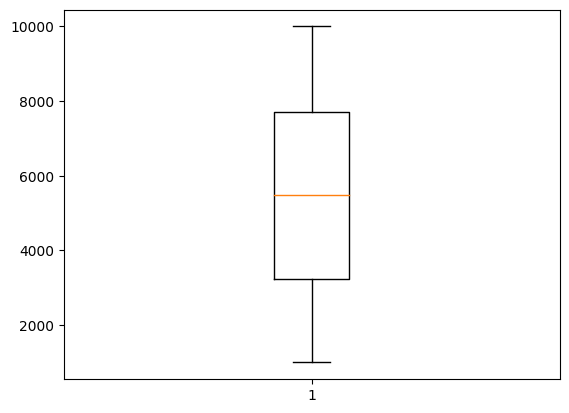

In [44]:
# Plot for Outlier
plt.boxplot(data['Distance'])
plt.show()

In [45]:
# For Duration
data['Duration'] = pd.to_numeric(data['Duration'], errors='coerce')
q3 = data.Duration.quantile(0.75)
q1 = data.Duration.quantile(0.25)
iqr = (q3 - q1)
upper_tres = q3 + (1.5*iqr)
lower_tres = q1 - (1.5*iqr)
upper_tres,lower_tres

(19.065, -3.375000000000001)

In [46]:
data['Duration'] = data['Duration'].clip(upper_tres,lower_tres)

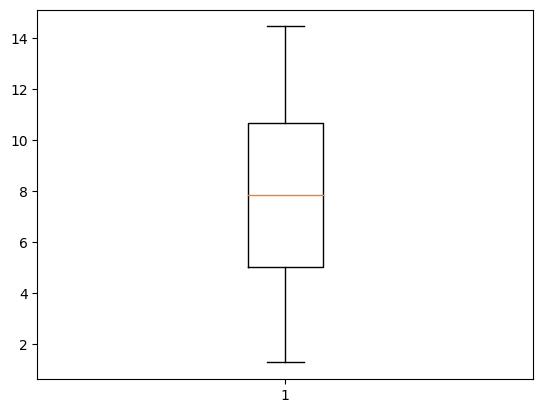

In [47]:
# Plot for Outlier
plt.boxplot(data['Duration'])
plt.show()

In [48]:
# For Number_of_Stop
data['Number_of_Stops'] = pd.to_numeric(data['Number_of_Stops'], errors='coerce')
q3 = data.Number_of_Stops.quantile(0.75)
q1 = data.Number_of_Stops.quantile(0.25)
iqr = (q3 - q1)
upper_tres = q3 + (1.5*iqr)
lower_tres = q1 - (1.5*iqr)
upper_tres,lower_tres

(2.5, -1.5)

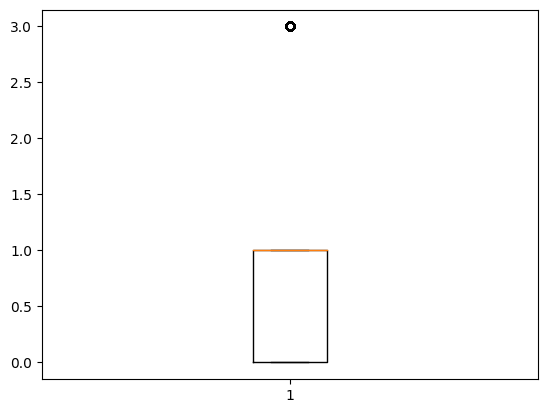

In [49]:
# Plot for Outlier
plt.boxplot(data['Number_of_Stops'] )
plt.show()

In [50]:
# For Passenger_Count
data['Passenger_Count'] = pd.to_numeric(data['Passenger_Count'], errors='coerce')
q3 = data.Passenger_Count.quantile(0.75)
q1 = data.Passenger_Count.quantile(0.25)
iqr = (q3 - q1)
upper_tres = q3 + (1.5*iqr)
lower_tres = q1 - (1.5*iqr)
upper_tres,lower_tres

(427.0, -77.0)

In [51]:
data['Passenger_Count'] = data['Passenger_Count'].clip(upper_tres,lower_tres)

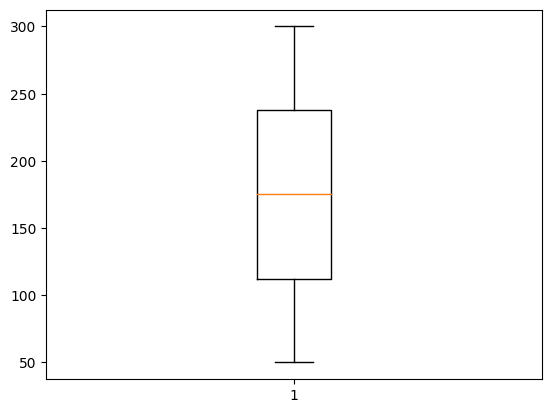

In [52]:
# Plot for Outlier
plt.boxplot(data['Passenger_Count'] )
plt.show()

In [53]:
# For Fuel_Price
data['Fuel_Price'] = pd.to_numeric(data['Fuel_Price'], errors='coerce')
q3 = data.Fuel_Price.quantile(0.75)
q1 = data.Fuel_Price.quantile(0.25)
iqr = (q3 - q1)
upper_tres = q3 + (1.5*iqr)
lower_tres = q1 - (1.5*iqr)
upper_tres,lower_tres

(1.53, 0.17000000000000004)

In [54]:
data['Fuel_Price'] = data['Fuel_Price'].clip(upper_tres,lower_tres)

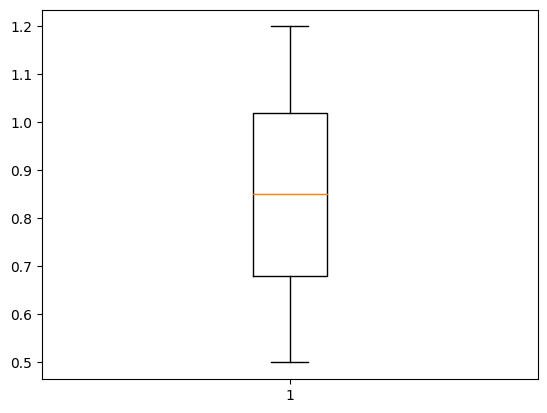

In [55]:
# Plot for Outlier
plt.boxplot(data['Fuel_Price'] )
plt.show()

In [56]:
# For Flight_Price
data['Flight_Price'] = pd.to_numeric(data['Flight_Price'], errors='coerce')
q3 = data.Flight_Price.quantile(0.75)
q1 = data.Flight_Price.quantile(0.25)
iqr = (q3 - q1)
upper_tres = q3 + (1.5*iqr)
lower_tres = q1 - (1.5*iqr)
upper_tres,lower_tres

(1015.7150000000003, 119.37499999999983)

In [57]:
data['Flight_Price'] = data['Flight_Price'].clip(upper_tres,lower_tres)

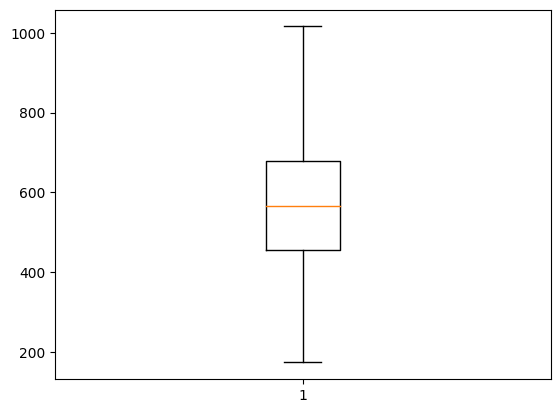

In [58]:
# Plot for Outlier
plt.boxplot(data['Flight_Price'] )
plt.show()

In [59]:
## Exploratory Data Analysis (EDA)

In [60]:
data

,Airline,Departure_City,Arrival_City,Distance,Duration,Aircraft_Type,Number_of_Stops,Day_of_Week,Month_of_Travel,Holiday_Season,Demand,Weather_Conditions,Passenger_Count,Promotion_Type,Fuel_Price,Flight_Price
1,Airline C,Leonardland,New Stephen,2942.0,5.29,Airbus A320,0,Wednesday,March,Spring,Low,Rain,107,Special Offer,1.08,423.13
2,Airline B,South Dylanville,Port Ambermouth,2468.0,4.41,Boeing 787,1,Sunday,September,Summer,High,Cloudy,131,Special Offer,0.52,442.17
3,Airline A,Blakefort,Crosbyberg,3145.0,4.96,Boeing 787,0,Sunday,February,Fall,Low,Cloudy,170,Discount,0.71,394.42
4,Airline B,Michaelport,Onealborough,5558.0,8.09,Boeing 737,1,Thursday,January,Spring,Low,Clear,181,Special Offer,1.09,804.35
5,Airline B,Lake Steveville,East Patriciafurt,6254.0,8.43,Airbus A320,0,Tuesday,December,Spring,Low,Snow,267,Special Offer,1.15,596.86
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,Airline B,Port Donaldland,Maryshire,3884.0,5.70,Boeing 787,1,Sunday,May,Fall,Low,Clear,263,Discount,0.69,417.18
44996,Airline A,East Patriciafurt,East Vickiberg,9191.0,12.97,Airbus A320,1,Friday,December,Fall,Low,Snow,168,Discount,0.74,687.03
44997,Airline C,Monicaton,West Johnburgh,6757.0,8.81,Boeing 777,1,Wednesday,October,Fall,Low,Snow,244,Special Offer,0.83,547.39
44998,Airline B,Turnerburgh,Gabrielville,3587.0,6.21,Boeing 737,0,Saturday,June,Spring,Medium,Cloudy,121,Special Offer,0.60,487.67


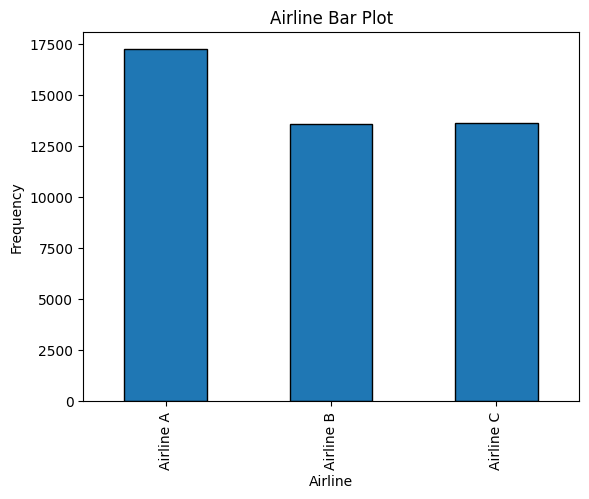

In [61]:
# Airline Barplot
# Airline vs Frequency
data['Airline'].value_counts().sort_index().plot(kind='bar', edgecolor='k')
plt.title('Airline Bar Plot')
plt.xlabel('Airline')
plt.ylabel('Frequency')
plt.show()

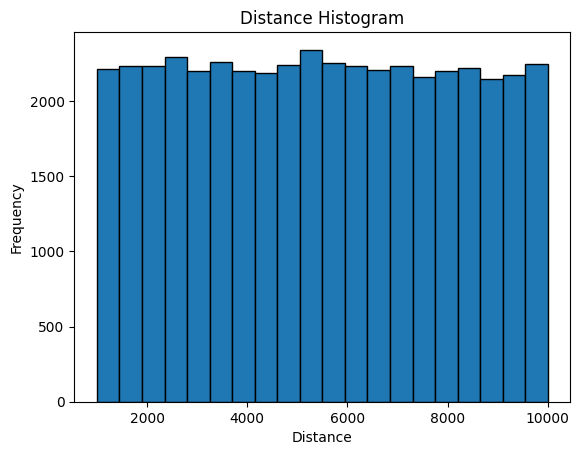

In [62]:
# Distance
# Distance vs Frequency
data['Distance'].plot(kind='hist', bins=20, edgecolor='k')  # Adjust the number of bins as needed
plt.title('Distance Histogram')
plt.xlabel('Distance')
plt.ylabel('Frequency')
plt.show()

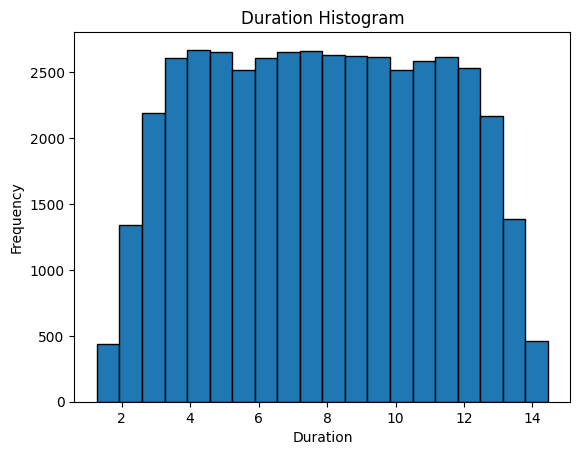

In [63]:
# Duration
# Duration vs Frequency
data['Duration'].plot(kind='hist', bins=20, edgecolor='k')  # Adjust the number of bins as needed
plt.title('Duration Histogram')
plt.xlabel('Duration')
plt.ylabel('Frequency')
plt.show()

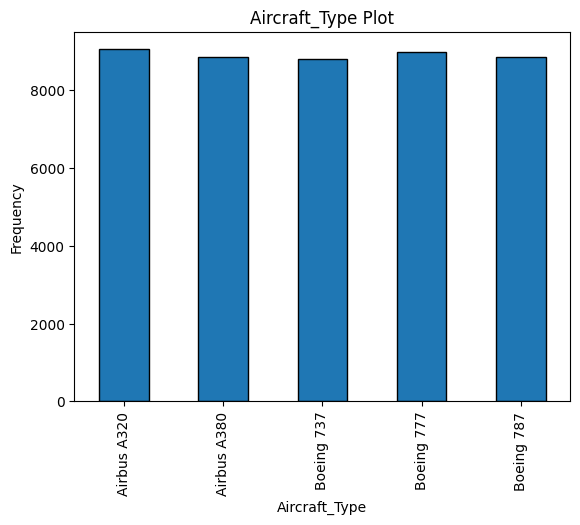

In [64]:
# Aircraft_Type
# Aircraft_Type vs Frequency
data['Aircraft_Type'].value_counts().sort_index().plot(kind='bar', edgecolor='k')
plt.title('Aircraft_Type Plot')
plt.xlabel('Aircraft_Type')
plt.ylabel('Frequency')
plt.show()

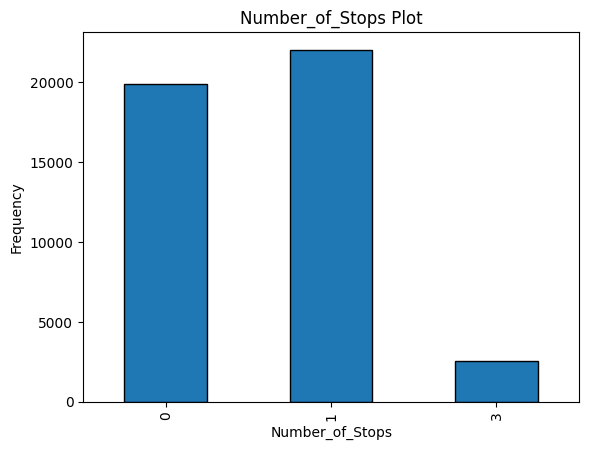

In [65]:
# Number_of_stops
# Number_of_stops vs Frequency
data['Number_of_Stops'].value_counts().sort_index().plot(kind='bar', edgecolor='k')
plt.title('Number_of_Stops Plot')
plt.xlabel('Number_of_Stops')
plt.ylabel('Frequency')
plt.show()

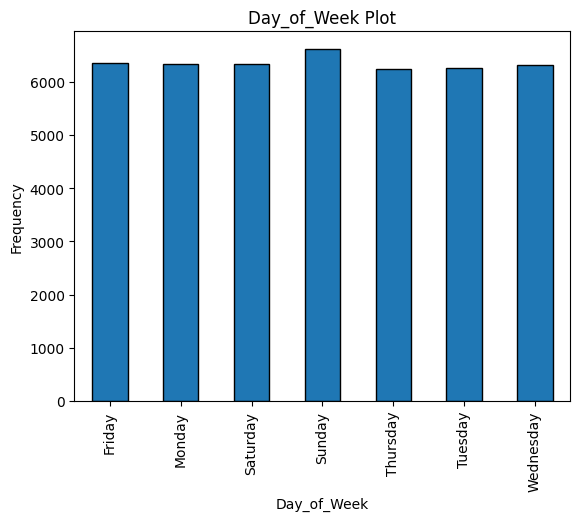

In [66]:
# Day_of_Week
# Day_of_Week vs Frequency
data['Day_of_Week'].value_counts().sort_index().plot(kind='bar', edgecolor='k')
plt.title('Day_of_Week Plot')
plt.xlabel('Day_of_Week')
plt.ylabel('Frequency')
plt.show()

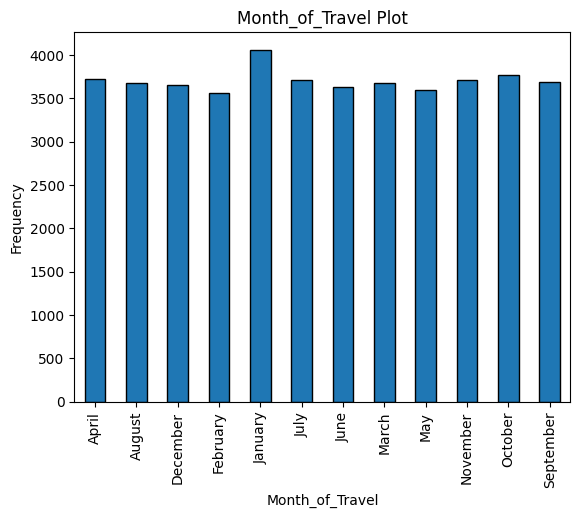

In [67]:
# Month_of_Travel
# Month_of_Travel vs Frequency
data['Month_of_Travel'].value_counts().sort_index().plot(kind='bar', edgecolor='k')
plt.title('Month_of_Travel Plot')
plt.xlabel('Month_of_Travel')
plt.ylabel('Frequency')
plt.show()

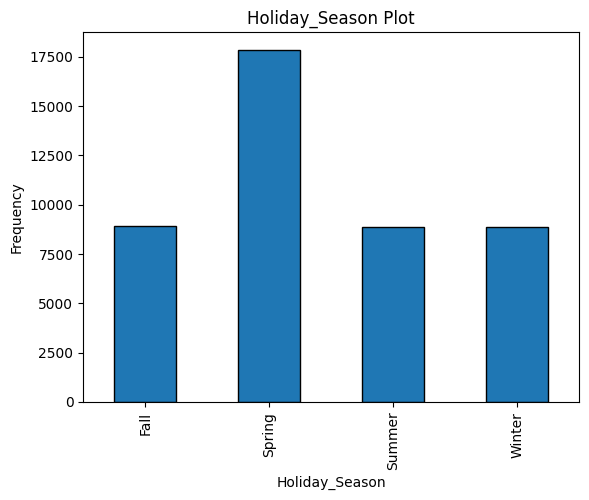

In [68]:
# Holiday_Seasons
# Holiday_Season vs Frequency
data['Holiday_Season'].value_counts().sort_index().plot(kind='bar', edgecolor='k')
plt.title('Holiday_Season Plot')
plt.xlabel('Holiday_Season')
plt.ylabel('Frequency')
plt.show()

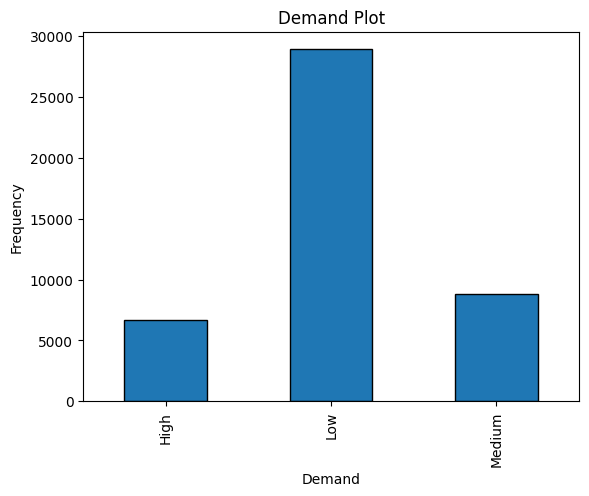

In [69]:
# Demand
# Demand vs Frequency
data['Demand'].value_counts().sort_index().plot(kind='bar', edgecolor='k')
plt.title('Demand Plot')
plt.xlabel('Demand')
plt.ylabel('Frequency')
plt.show()

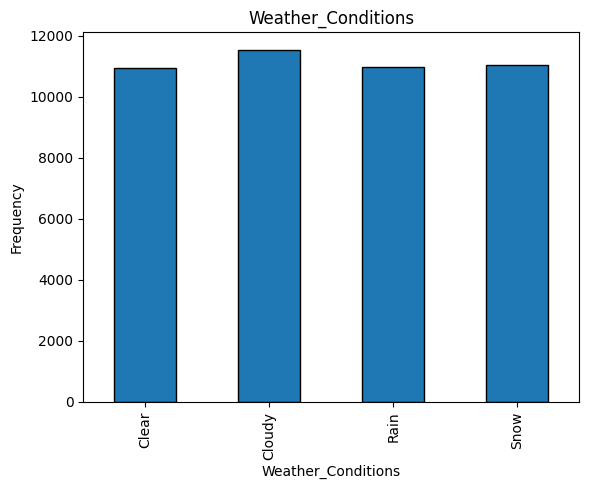

In [70]:
# Weather_Condition
# Weather_Condition vs Frequency
data['Weather_Conditions'].value_counts().sort_index().plot(kind='bar', edgecolor='k')
plt.title('Weather_Conditions')
plt.xlabel('Weather_Conditions')
plt.ylabel('Frequency')
plt.show()

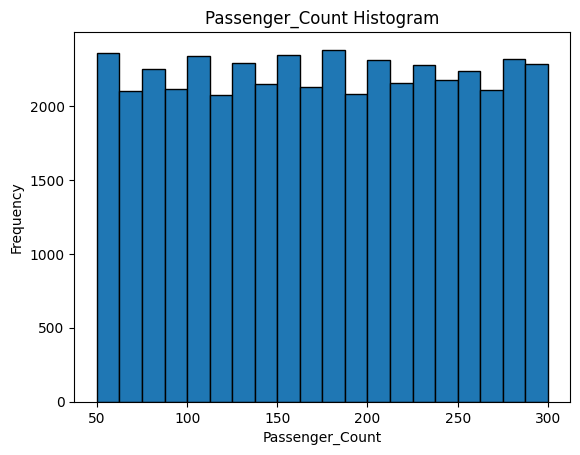

In [71]:
# Passenger_Count
# Passenger_Count vs Frequency
data['Passenger_Count'].plot(kind='hist', bins=20, edgecolor='k')  # Adjust the number of bins as needed
plt.title('Passenger_Count Histogram')
plt.xlabel('Passenger_Count')
plt.ylabel('Frequency')
plt.show()

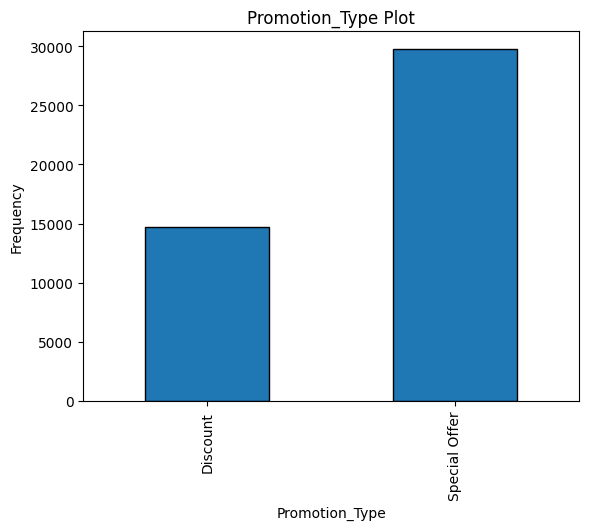

In [72]:
# Promotion_Type
# Promotion_Type vs Frequency
data['Promotion_Type'].value_counts().sort_index().plot(kind='bar', edgecolor='k')
plt.title('Promotion_Type Plot')
plt.xlabel('Promotion_Type')
plt.ylabel('Frequency')
plt.show()

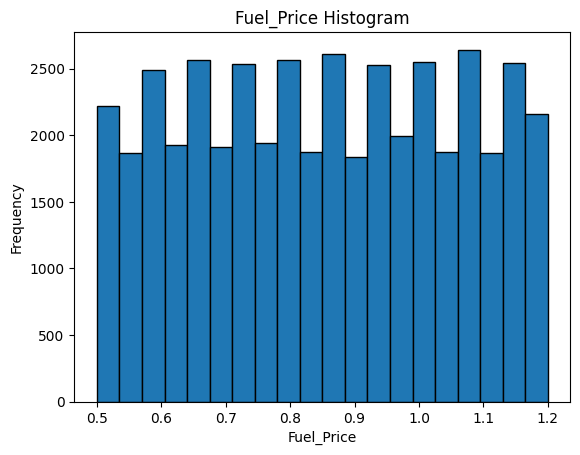

In [73]:
# Fuel_Price
# Fuel_Price vs Frequency
data['Fuel_Price'].plot(kind='hist', bins=20, edgecolor='k')  # Adjust the number of bins as needed
plt.title('Fuel_Price Histogram')
plt.xlabel('Fuel_Price')
plt.ylabel('Frequency')
plt.show()

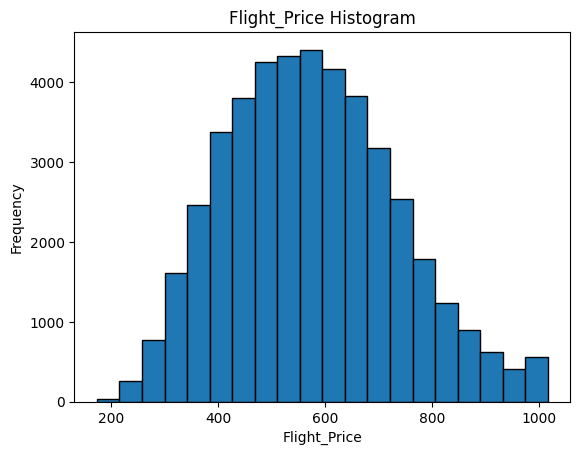

In [74]:
# Flight_Price
# Flight_Price vs Freqency
data['Flight_Price'].plot(kind='hist', bins=20, edgecolor='k')  # Adjust the number of bins as needed
plt.title('Flight_Price Histogram')
plt.xlabel('Flight_Price')
plt.ylabel('Frequency')
plt.show()

In [75]:
## Feature vs Target
data

,Airline,Departure_City,Arrival_City,Distance,Duration,Aircraft_Type,Number_of_Stops,Day_of_Week,Month_of_Travel,Holiday_Season,Demand,Weather_Conditions,Passenger_Count,Promotion_Type,Fuel_Price,Flight_Price
1,Airline C,Leonardland,New Stephen,2942.0,5.29,Airbus A320,0,Wednesday,March,Spring,Low,Rain,107,Special Offer,1.08,423.13
2,Airline B,South Dylanville,Port Ambermouth,2468.0,4.41,Boeing 787,1,Sunday,September,Summer,High,Cloudy,131,Special Offer,0.52,442.17
3,Airline A,Blakefort,Crosbyberg,3145.0,4.96,Boeing 787,0,Sunday,February,Fall,Low,Cloudy,170,Discount,0.71,394.42
4,Airline B,Michaelport,Onealborough,5558.0,8.09,Boeing 737,1,Thursday,January,Spring,Low,Clear,181,Special Offer,1.09,804.35
5,Airline B,Lake Steveville,East Patriciafurt,6254.0,8.43,Airbus A320,0,Tuesday,December,Spring,Low,Snow,267,Special Offer,1.15,596.86
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,Airline B,Port Donaldland,Maryshire,3884.0,5.70,Boeing 787,1,Sunday,May,Fall,Low,Clear,263,Discount,0.69,417.18
44996,Airline A,East Patriciafurt,East Vickiberg,9191.0,12.97,Airbus A320,1,Friday,December,Fall,Low,Snow,168,Discount,0.74,687.03
44997,Airline C,Monicaton,West Johnburgh,6757.0,8.81,Boeing 777,1,Wednesday,October,Fall,Low,Snow,244,Special Offer,0.83,547.39
44998,Airline B,Turnerburgh,Gabrielville,3587.0,6.21,Boeing 737,0,Saturday,June,Spring,Medium,Cloudy,121,Special Offer,0.60,487.67


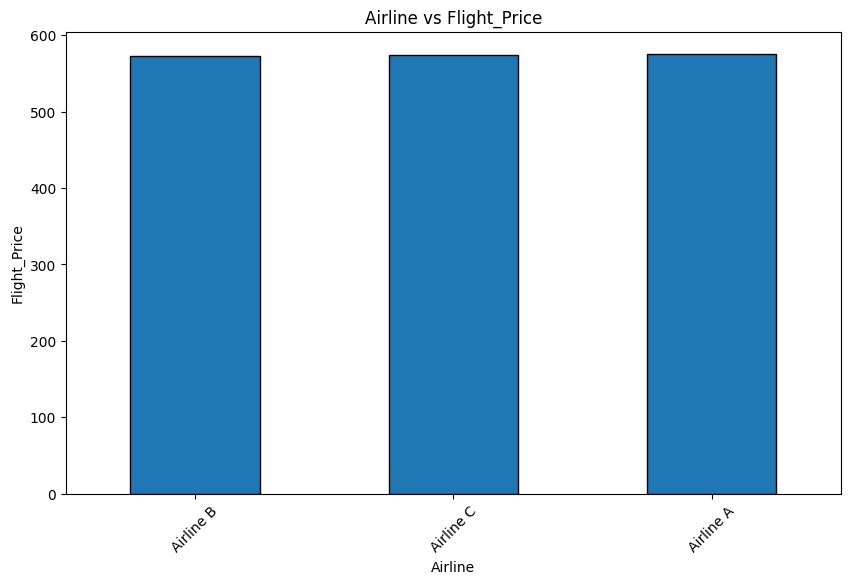

In [76]:
# Airline vs Flight_Price

# Group the data by 'Airline' and calculate the mean Flight_Price for each airline
airline_flight_price = data.groupby('Airline')['Flight_Price'].mean()

# Sort the values in descending order (for example, to show the highest average prices at the top)
airline_flight_price = airline_flight_price.sort_values(ascending=True)

# Create a bar plot
plt.figure(figsize=(10, 6))  # Set the figure size
airline_flight_price.plot(kind='bar', edgecolor='k')
plt.title('Airline vs Flight_Price')
plt.xlabel('Airline')
plt.ylabel('Flight_Price')
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability
plt.show()

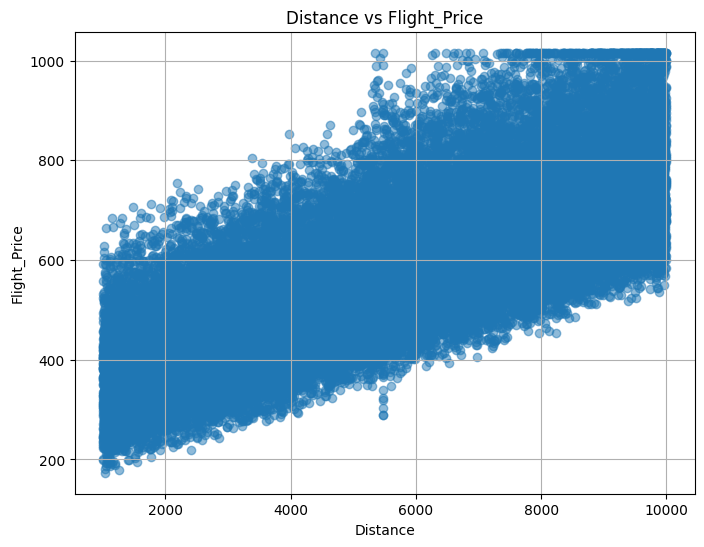

In [77]:
# Distance vs Flight_Price
plt.figure(figsize=(8, 6))  # Set the figure size
plt.scatter(data['Distance'], data['Flight_Price'], alpha=0.5)
plt.title('Distance vs Flight_Price')
plt.xlabel('Distance')
plt.ylabel('Flight_Price')
plt.grid(True)
plt.show()

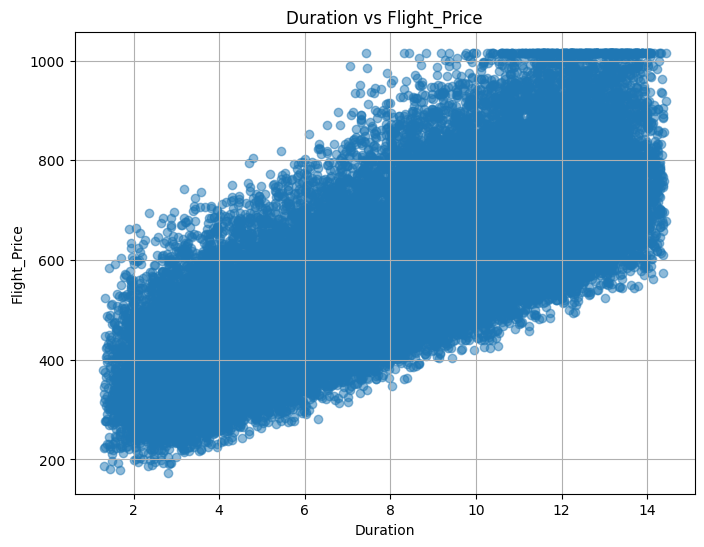

In [78]:
# Duration vs Flight_Price
plt.figure(figsize=(8, 6))  # Set the figure size
plt.scatter(data['Duration'], data['Flight_Price'], alpha=0.5)
plt.title('Duration vs Flight_Price')
plt.xlabel('Duration')
plt.ylabel('Flight_Price')
plt.grid(True)
plt.show()

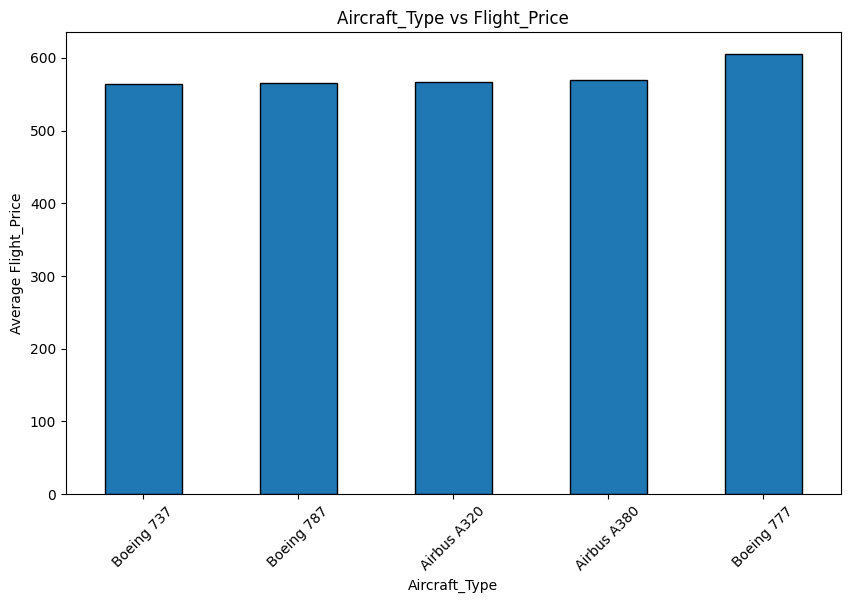

In [79]:
# Aircraft_Type vs Flight_Price

# Group the data by 'Airline' and calculate the mean Flight_Price for each airline
airline_flight_price = data.groupby('Aircraft_Type')['Flight_Price'].mean()

# Sort the values in descending order (for example, to show the highest average prices at the top)
airline_flight_price = airline_flight_price.sort_values(ascending=True)

# Create a bar plot
plt.figure(figsize=(10, 6))  # Set the figure size
airline_flight_price.plot(kind='bar', edgecolor='k')
plt.title('Aircraft_Type vs Flight_Price')
plt.xlabel('Aircraft_Type')
plt.ylabel('Average Flight_Price')
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability
plt.show()

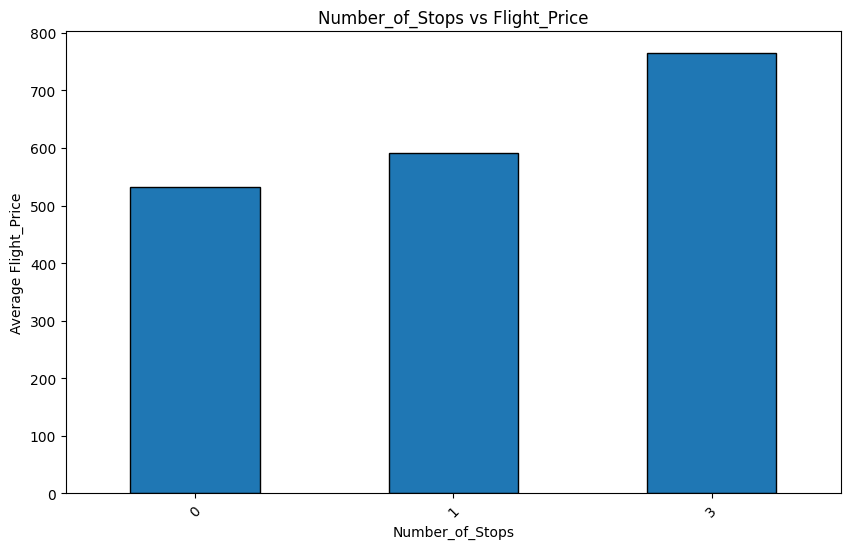

In [80]:
# Number_of_stops vs Flight_Price

# Group the data by 'Airline' and calculate the mean Flight_Price for each airline
airline_flight_price = data.groupby('Number_of_Stops')['Flight_Price'].mean()

# Sort the values in descending order (for example, to show the highest average prices at the top)
airline_flight_price = airline_flight_price.sort_values(ascending=True)

# Create a bar plot
plt.figure(figsize=(10, 6))  # Set the figure size
airline_flight_price.plot(kind='bar', edgecolor='k')
plt.title('Number_of_Stops vs Flight_Price')
plt.xlabel('Number_of_Stops')
plt.ylabel('Average Flight_Price')
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability
plt.show()

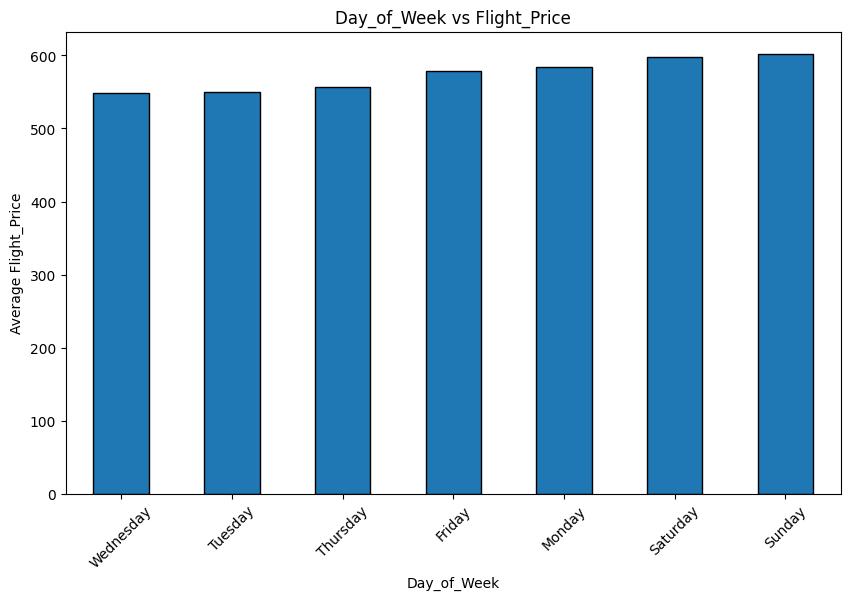

In [81]:
# Day_of_Week vs Flight_Price

# Group the data by 'Airline' and calculate the mean Flight_Price for each airline
airline_flight_price = data.groupby('Day_of_Week')['Flight_Price'].mean()

# Sort the values in descending order (for example, to show the highest average prices at the top)
airline_flight_price = airline_flight_price.sort_values(ascending=True)

# Create a bar plot
plt.figure(figsize=(10, 6))  # Set the figure size
airline_flight_price.plot(kind='bar', edgecolor='k')
plt.title('Day_of_Week vs Flight_Price')
plt.xlabel('Day_of_Week')
plt.ylabel('Average Flight_Price')
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability
plt.show()

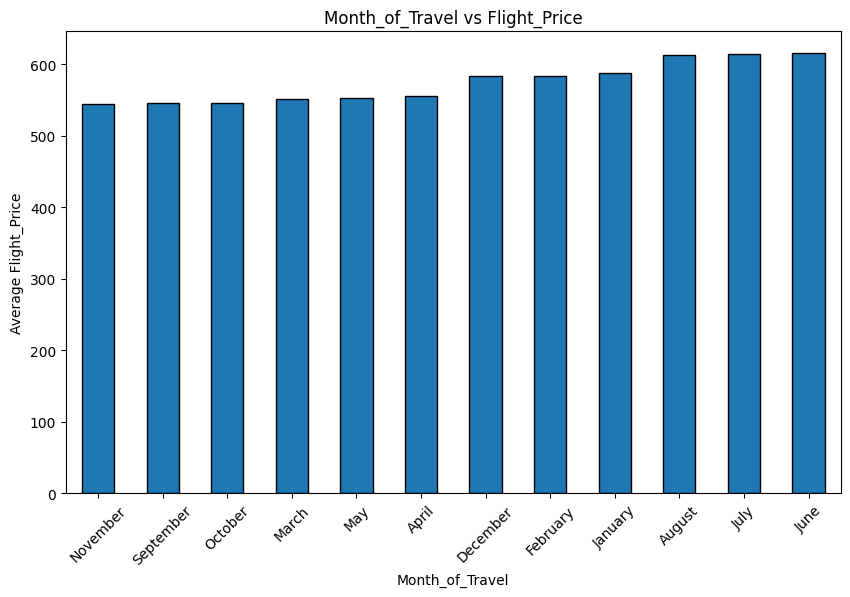

In [82]:
# Month_of_Travel vs Flight_Price

# Group the data by 'Airline' and calculate the mean Flight_Price for each airline
airline_flight_price = data.groupby('Month_of_Travel')['Flight_Price'].mean()

# Sort the values in descending order (for example, to show the highest average prices at the top)
airline_flight_price = airline_flight_price.sort_values(ascending=True)

# Create a bar plot
plt.figure(figsize=(10, 6))  # Set the figure size
airline_flight_price.plot(kind='bar', edgecolor='k')
plt.title('Month_of_Travel vs Flight_Price')
plt.xlabel('Month_of_Travel')
plt.ylabel('Average Flight_Price')
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability
plt.show()

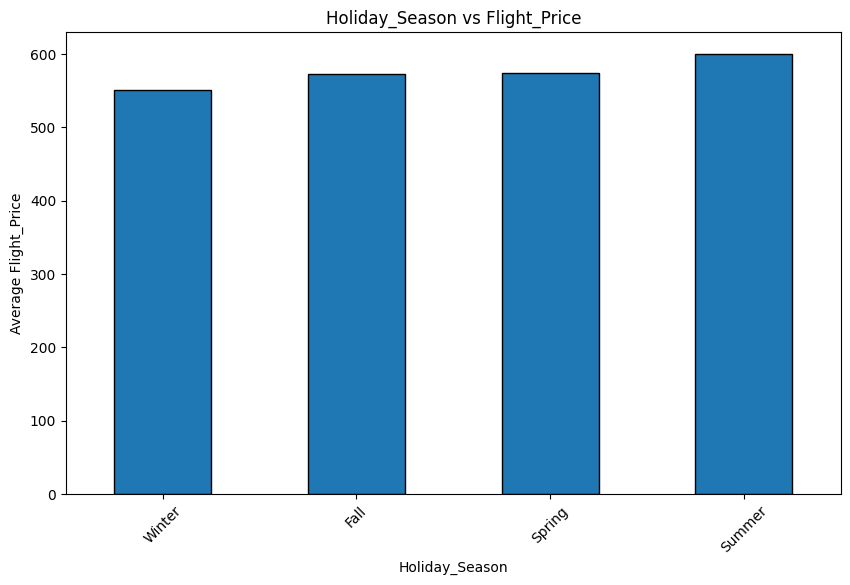

In [83]:
# Holiday_Season vs Flight_Price
# Group the data by 'Airline' and calculate the mean Flight_Price for each airline
airline_flight_price = data.groupby('Holiday_Season')['Flight_Price'].mean()

# Sort the values in descending order (for example, to show the highest average prices at the top)
airline_flight_price = airline_flight_price.sort_values(ascending=True)

# Create a bar plot
plt.figure(figsize=(10, 6))  # Set the figure size
airline_flight_price.plot(kind='bar', edgecolor='k')
plt.title('Holiday_Season vs Flight_Price')
plt.xlabel('Holiday_Season')
plt.ylabel('Average Flight_Price')
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability
plt.show()

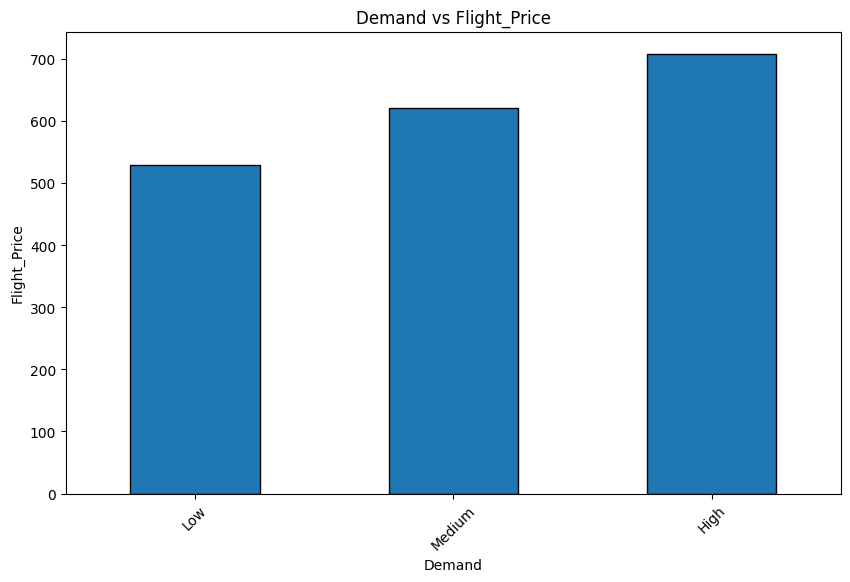

In [84]:
# Demand vs Flight_Price


# Group the data by 'Airline' and calculate the mean Flight_Price for each airline
airline_flight_price = data.groupby('Demand')['Flight_Price'].mean()

# Sort the values in descending order (for example, to show the highest average prices at the top)
airline_flight_price = airline_flight_price.sort_values(ascending=True)

# Create a bar plot
plt.figure(figsize=(10, 6))  # Set the figure size
airline_flight_price.plot(kind='bar', edgecolor='k')
plt.title('Demand vs Flight_Price')
plt.xlabel('Demand')
plt.ylabel('Flight_Price')
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability
plt.show()

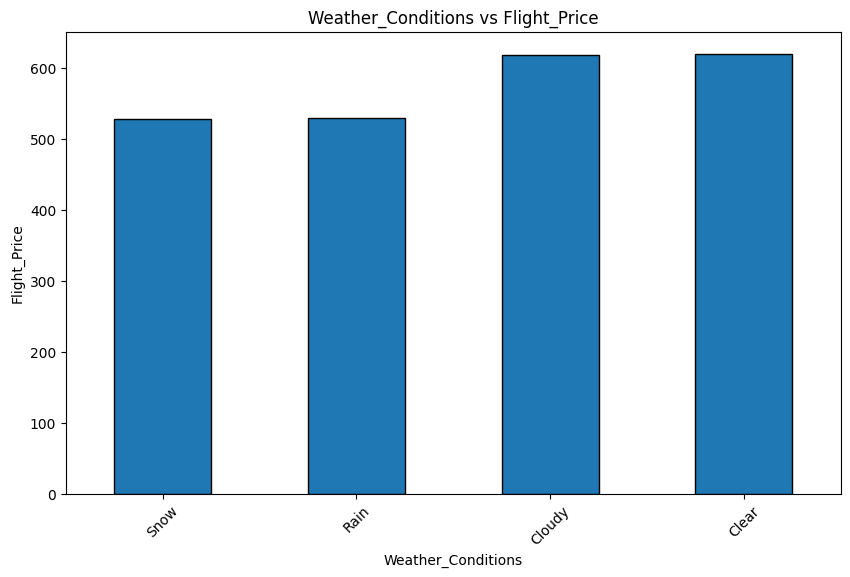

In [85]:
# Weather_Condition vs Flight_Price

# Group the data by 'Airline' and calculate the mean Flight_Price for each airline
airline_flight_price = data.groupby('Weather_Conditions')['Flight_Price'].mean()

# Sort the values in descending order (for example, to show the highest average prices at the top)
airline_flight_price = airline_flight_price.sort_values(ascending=True)

# Create a bar plot
plt.figure(figsize=(10, 6))  # Set the figure size
airline_flight_price.plot(kind='bar', edgecolor='k')
plt.title('Weather_Conditions vs Flight_Price')
plt.xlabel('Weather_Conditions')
plt.ylabel('Flight_Price')
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability
plt.show()

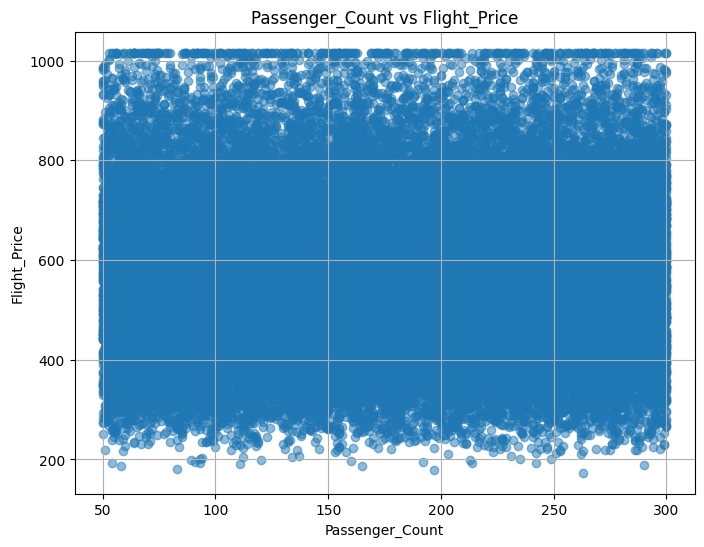

In [86]:
# Passenger_Count vs Flight_Price

plt.figure(figsize=(8, 6))  # Set the figure size
plt.scatter(data['Passenger_Count'], data['Flight_Price'], alpha=0.5)
plt.title('Passenger_Count vs Flight_Price')
plt.xlabel('Passenger_Count')
plt.ylabel('Flight_Price')
plt.grid(True)
plt.show()

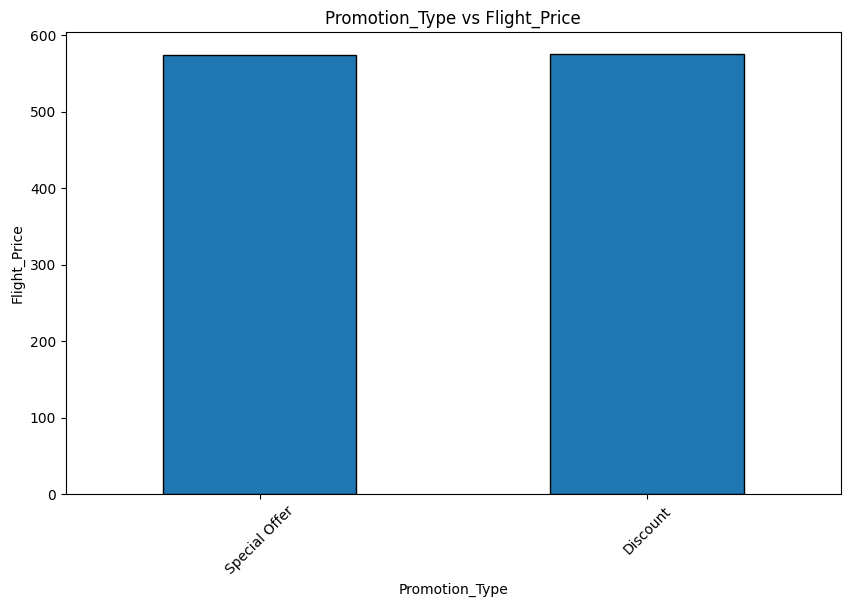

In [87]:
# Promotion_Type vs Flight_Price

# Group the data by 'Airline' and calculate the mean Flight_Price for each airline
airline_flight_price = data.groupby('Promotion_Type')['Flight_Price'].mean()

# Sort the values in descending order (for example, to show the highest average prices at the top)
airline_flight_price = airline_flight_price.sort_values(ascending=True)

# Create a bar plot
plt.figure(figsize=(10, 6))  # Set the figure size
airline_flight_price.plot(kind='bar', edgecolor='k')
plt.title('Promotion_Type vs Flight_Price')
plt.xlabel('Promotion_Type')
plt.ylabel('Flight_Price')
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability
plt.show()

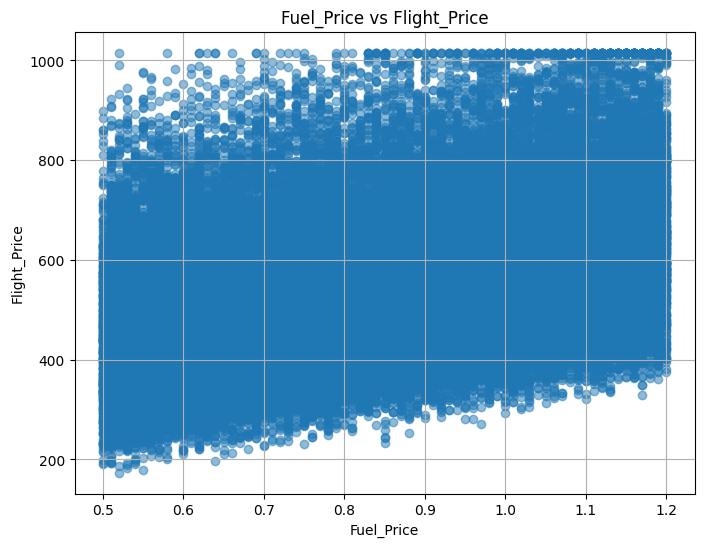

In [88]:
# Fuel_Price vs Flight_Price

# Create a scatter plot of Distance vs. Flight Price
plt.figure(figsize=(8, 6))  # Set the figure size
plt.scatter(data['Fuel_Price'], data['Flight_Price'], alpha=0.5)
plt.title('Fuel_Price vs Flight_Price')
plt.xlabel('Fuel_Price')
plt.ylabel('Flight_Price')
plt.grid(True)
plt.show()

In [89]:
## Encoding
data

,Airline,Departure_City,Arrival_City,Distance,Duration,Aircraft_Type,Number_of_Stops,Day_of_Week,Month_of_Travel,Holiday_Season,Demand,Weather_Conditions,Passenger_Count,Promotion_Type,Fuel_Price,Flight_Price
1,Airline C,Leonardland,New Stephen,2942.0,5.29,Airbus A320,0,Wednesday,March,Spring,Low,Rain,107,Special Offer,1.08,423.13
2,Airline B,South Dylanville,Port Ambermouth,2468.0,4.41,Boeing 787,1,Sunday,September,Summer,High,Cloudy,131,Special Offer,0.52,442.17
3,Airline A,Blakefort,Crosbyberg,3145.0,4.96,Boeing 787,0,Sunday,February,Fall,Low,Cloudy,170,Discount,0.71,394.42
4,Airline B,Michaelport,Onealborough,5558.0,8.09,Boeing 737,1,Thursday,January,Spring,Low,Clear,181,Special Offer,1.09,804.35
5,Airline B,Lake Steveville,East Patriciafurt,6254.0,8.43,Airbus A320,0,Tuesday,December,Spring,Low,Snow,267,Special Offer,1.15,596.86
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,Airline B,Port Donaldland,Maryshire,3884.0,5.70,Boeing 787,1,Sunday,May,Fall,Low,Clear,263,Discount,0.69,417.18
44996,Airline A,East Patriciafurt,East Vickiberg,9191.0,12.97,Airbus A320,1,Friday,December,Fall,Low,Snow,168,Discount,0.74,687.03
44997,Airline C,Monicaton,West Johnburgh,6757.0,8.81,Boeing 777,1,Wednesday,October,Fall,Low,Snow,244,Special Offer,0.83,547.39
44998,Airline B,Turnerburgh,Gabrielville,3587.0,6.21,Boeing 737,0,Saturday,June,Spring,Medium,Cloudy,121,Special Offer,0.60,487.67


In [90]:
# Define the columns to be encoded with label encoding
ordinal_cols = ['Day_of_Week', 'Month_of_Travel', 'Holiday_Season', 'Demand', 'Promotion_Type']

# Apply ordinal/Label encoding
label_encoder = LabelEncoder()
for col in ordinal_cols:
    data[col] = label_encoder.fit_transform(data[col])

data.head()

,Airline,Departure_City,Arrival_City,Distance,Duration,Aircraft_Type,Number_of_Stops,Day_of_Week,Month_of_Travel,Holiday_Season,Demand,Weather_Conditions,Passenger_Count,Promotion_Type,Fuel_Price,Flight_Price
1,Airline C,Leonardland,New Stephen,2942.0,5.29,Airbus A320,0,6,7,1,1,Rain,107,1,1.08,423.13
2,Airline B,South Dylanville,Port Ambermouth,2468.0,4.41,Boeing 787,1,3,11,2,0,Cloudy,131,1,0.52,442.17
3,Airline A,Blakefort,Crosbyberg,3145.0,4.96,Boeing 787,0,3,3,0,1,Cloudy,170,0,0.71,394.42
4,Airline B,Michaelport,Onealborough,5558.0,8.09,Boeing 737,1,4,4,1,1,Clear,181,1,1.09,804.35
5,Airline B,Lake Steveville,East Patriciafurt,6254.0,8.43,Airbus A320,0,5,2,1,1,Snow,267,1,1.15,596.86


In [91]:
# Define the columns to be encoded with one-hot encoding
categorical_cols = ['Airline', 'Aircraft_Type', 'Weather_Conditions']
# Apply one-hot encoding
data = pd.get_dummies(data, columns=categorical_cols, drop_first=True)

In [92]:
data

,Departure_City,Arrival_City,Distance,Duration,Number_of_Stops,Day_of_Week,Month_of_Travel,Holiday_Season,Demand,Passenger_Count,...,Flight_Price,Airline_Airline B,Airline_Airline C,Aircraft_Type_Airbus A380,Aircraft_Type_Boeing 737,Aircraft_Type_Boeing 777,Aircraft_Type_Boeing 787,Weather_Conditions_Cloudy,Weather_Conditions_Rain,Weather_Conditions_Snow
1,Leonardland,New Stephen,2942.0,5.29,0,6,7,1,1,107,...,423.13,False,True,False,False,False,False,False,True,False
2,South Dylanville,Port Ambermouth,2468.0,4.41,1,3,11,2,0,131,...,442.17,True,False,False,False,False,True,True,False,False
3,Blakefort,Crosbyberg,3145.0,4.96,0,3,3,0,1,170,...,394.42,False,False,False,False,False,True,True,False,False
4,Michaelport,Onealborough,5558.0,8.09,1,4,4,1,1,181,...,804.35,True,False,False,True,False,False,False,False,False
5,Lake Steveville,East Patriciafurt,6254.0,8.43,0,5,2,1,1,267,...,596.86,True,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,Port Donaldland,Maryshire,3884.0,5.70,1,3,8,0,1,263,...,417.18,True,False,False,False,False,True,False,False,False
44996,East Patriciafurt,East Vickiberg,9191.0,12.97,1,0,2,0,1,168,...,687.03,False,False,False,False,False,False,False,False,True
44997,Monicaton,West Johnburgh,6757.0,8.81,1,6,10,0,1,244,...,547.39,False,True,False,False,True,False,False,False,True
44998,Turnerburgh,Gabrielville,3587.0,6.21,0,2,6,1,2,121,...,487.67,True,False,False,True,False,False,True,False,False


In [93]:
from sklearn.preprocessing import LabelEncoder
# Define the columns to be encoded with label encoding
ordinal_colss = ['Departure_City', 'Arrival_City']

# Apply ordinal/Label encoding
label_encoder = LabelEncoder()
for cols in ordinal_colss:
    data[cols] = label_encoder.fit_transform(data[cols])

data.head()

,Departure_City,Arrival_City,Distance,Duration,Number_of_Stops,Day_of_Week,Month_of_Travel,Holiday_Season,Demand,Passenger_Count,...,Flight_Price,Airline_Airline B,Airline_Airline C,Aircraft_Type_Airbus A380,Aircraft_Type_Boeing 737,Aircraft_Type_Boeing 777,Aircraft_Type_Boeing 787,Weather_Conditions_Cloudy,Weather_Conditions_Rain,Weather_Conditions_Snow
1,9522,12689,2942.0,5.29,0,6,7,1,1,107,...,423.13,False,True,False,False,False,False,False,True,False
2,18699,15316,2468.0,4.41,1,3,11,2,0,131,...,442.17,True,False,False,False,False,True,True,False,False
3,994,2414,3145.0,4.96,0,3,3,0,1,170,...,394.42,False,False,False,False,False,True,True,False,False
4,10493,14783,5558.0,8.09,1,4,4,1,1,181,...,804.35,True,False,False,True,False,False,False,False,False
5,9174,4333,6254.0,8.43,0,5,2,1,1,267,...,596.86,True,False,False,False,False,False,False,False,True


In [ ]:
## Perform leave-one-out encoding for card_type, card_number, and tid

In [ ]:
# from category_encoders import LeaveOneOutEncoder

# looe_encoder = LeaveOneOutEncoder(cols=['Departure_City', 'Arrival_City'])
# data= looe_encoder.fit_transform(data,data['Flight_Price'])

In [94]:
pd.set_option('display.max_columns', 500)

In [95]:
data

,Departure_City,Arrival_City,Distance,Duration,Number_of_Stops,Day_of_Week,Month_of_Travel,Holiday_Season,Demand,Passenger_Count,Promotion_Type,Fuel_Price,Flight_Price,Airline_Airline B,Airline_Airline C,Aircraft_Type_Airbus A380,Aircraft_Type_Boeing 737,Aircraft_Type_Boeing 777,Aircraft_Type_Boeing 787,Weather_Conditions_Cloudy,Weather_Conditions_Rain,Weather_Conditions_Snow
1,9522,12689,2942.0,5.29,0,6,7,1,1,107,1,1.08,423.13,False,True,False,False,False,False,False,True,False
2,18699,15316,2468.0,4.41,1,3,11,2,0,131,1,0.52,442.17,True,False,False,False,False,True,True,False,False
3,994,2414,3145.0,4.96,0,3,3,0,1,170,0,0.71,394.42,False,False,False,False,False,True,True,False,False
4,10493,14783,5558.0,8.09,1,4,4,1,1,181,1,1.09,804.35,True,False,False,True,False,False,False,False,False
5,9174,4333,6254.0,8.43,0,5,2,1,1,267,1,1.15,596.86,True,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,15638,10229,3884.0,5.70,1,3,8,0,1,263,0,0.69,417.18,True,False,False,False,False,True,False,False,False
44996,4312,4715,9191.0,12.97,1,0,2,0,1,168,0,0.74,687.03,False,False,False,False,False,False,False,False,True
44997,10660,22113,6757.0,8.81,1,6,10,0,1,244,1,0.83,547.39,False,True,False,False,True,False,False,False,True
44998,20553,5379,3587.0,6.21,0,2,6,1,2,121,1,0.60,487.67,True,False,False,True,False,False,True,False,False


In [ ]:
## Spliting

In [96]:
X= data.drop('Flight_Price',axis=1)
y = data['Flight_Price']

In [97]:
y

1        423.13
2        442.17
3        394.42
4        804.35
5        596.86
          ...  
44995    417.18
44996    687.03
44997    547.39
44998    487.67
44999    532.92
Name: Flight_Price, Length: 44476, dtype: float64

In [98]:
X.shape

(44476, 21)

In [99]:
y.shape

(44476,)

In [ ]:
## Scaling

In [100]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X= scaler.fit_transform(X)
X

array([[-0.30026547,  0.15008189, -0.98083303, ..., -0.59199535,
         1.74745271, -0.57444247],
       [ 1.07742605,  0.53991782, -1.16374526, ...,  1.68920246,
        -0.57226155, -0.57444247],
       [-1.58052626, -1.37468562, -0.9024972 , ...,  1.68920246,
        -0.57226155, -0.57444247],
       ...,
       [-0.12942391,  1.54856451,  0.49134029, ..., -0.59199535,
        -0.57226155,  1.74081836],
       [ 1.35575667, -0.93469188, -0.73193348, ...,  1.68920246,
        -0.57226155, -0.57444247],
       [-0.83801103, -1.44636082, -0.22911779, ..., -0.59199535,
         1.74745271, -0.57444247]])

In [ ]:
## Train and Test

In [101]:
from sklearn.model_selection import train_test_split
# test and train split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [ ]:
## Model

In [103]:
!pip install xgboost



     ---------------------------------------- 99.7/99.7 MB 2.2 MB/s eta 0:00:00



[notice] A new release of pip available: 22.3.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [104]:
import xgboost as xgb
from xgboost import XGBRegressor  # Use XGBRegressor for regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Load your dataset and split it into features (X) and the target (y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train an XGBoost regressor
xgregressor = XGBRegressor()
xgregressor.fit(X_train, y_train)

# Make predictions
y_pred = xgregressor.predict(X_test)

# Calculate Mean Squared Error (MSE) and R-squared (R2) score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print results
print("Mean Squared Error (MSE):", mse)
print("R-squared (R2) Score:", r2)

Mean Squared Error (MSE): 292.8011740168923
R-squared (R2) Score: 0.9884999667936561


In [ ]:
# learning rate will take comes under (0-1)

In [105]:
from sklearn.model_selection import cross_val_score
import xgboost as xgb

cross_val_xgb=[]
for lr in [0.01,0.05,0.08,0.1,0.2,0.25,0.3]:
  xgb_regressor= xgb.XGBRegressor(learning_rate = lr,n_estimators=100)
  xgb_regressor.fit(X_train,y_train)
  print("Learning rate : ", lr,"cross_val_score:", cross_val_score(xgb_regressor,X_train,y_train,cv = 15).mean())
  cross_val_xgb.append(cross_val_score(xgb_regressor,X_train,y_train,cv = 15).mean())

Learning rate :  0.01 cross_val_score: 0.7901783694262992
Learning rate :  0.05 cross_val_score: 0.9879653202940397
Learning rate :  0.08 cross_val_score: 0.9909369043382165
Learning rate :  0.1 cross_val_score: 0.9911095148380542
Learning rate :  0.2 cross_val_score: 0.9904937845145074
Learning rate :  0.25 cross_val_score: 0.9900528046283948
Learning rate :  0.3 cross_val_score: 0.9896262834654124


In [106]:
from sklearn.model_selection import cross_val_score
import xgboost as xgb
xgb_regressor= xgb.XGBRegressor(learning_rate =0.1,n_estimators=100)
xgb_regressor.fit(X_train,y_train)
print("Learning rate : ",0.1,"cross_val_score:", cross_val_score(xgb_regressor,X_train,y_train,cv = 15).mean())
cross_val_xgb.append(cross_val_score(xgb_regressor,X_train,y_train,cv = 15).mean())

Learning rate :  0.1 cross_val_score: 0.9911095148380542


In [107]:
cross_val_xgb_regressor=max(cross_val_xgb)
print("The best Learning rate is 0.1 and Cross_val_score is:",cross_val_xgb_regressor)

The best Learning rate is 0.1 and Cross_val_score is: 0.9911095148380542


In [108]:
# Make predictions
y_pred = xgb_regressor.predict(X_test)

In [109]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print results
print("Mean Squared Error (MSE):", mse)
print("R-squared (R2) Score:", r2)

Mean Squared Error (MSE): 254.21317227683411
R-squared (R2) Score: 0.9900155457624464


In [110]:
xgb_regressor.feature_importances_

array([3.05101828e-04, 2.43586066e-04, 3.43993932e-01, 2.33561546e-01,
       6.61484599e-02, 2.06983797e-02, 2.24293247e-02, 1.89665210e-04,
       2.05356598e-01, 2.86525465e-04, 1.59400544e-04, 1.03358164e-01,
       1.12003640e-04, 1.38907897e-04, 1.07417298e-04, 1.00328252e-04,
       2.55568506e-04, 3.85813764e-04, 6.44306012e-04, 6.52837160e-04,
       8.72087781e-04], dtype=float32)

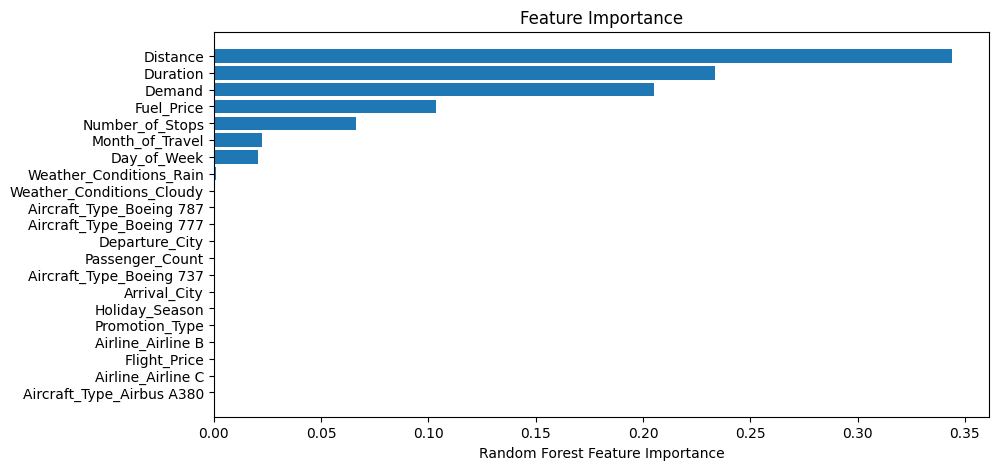

In [111]:
sorted_idx = xgb_regressor.feature_importances_.argsort()
plt.figure(figsize=(10,5))
plt.barh(data.columns[sorted_idx], xgb_regressor.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")
plt.title("Feature Importance")
plt.show()


In [ ]:
## Get the Data

In [112]:
b=pd.read_csv('test.csv')
b

,Flight_ID,Airline,Departure_City,Arrival_City,Distance,Departure_Time,Arrival_Time,Duration,Aircraft_Type,Number_of_Stops,Day_of_Week,Month_of_Travel,Holiday_Season,Demand,Weather_Conditions,Passenger_Count,Promotion_Type,Fuel_Price
0,F45001,Airline B,Davidstad,Moorebury,3096.0,18:43,0:14,5.52,Boeing 737,1,Saturday,August,Summer,Medium,Clear,110,NaN,0.95
1,F45002,Airline A,Lake Tyler,Camachoberg,8760.0,1:16,13:04,11.80,Airbus A380,1,Thursday,April,NaN,High,Clear,295,Discount,1.05
2,F45003,Airline C,New Carol,West Ryanfurt,6365.0,12:17,21:52,9.59,Boeing 777,1,Sunday,January,NaN,Low,Rain,223,Discount,0.63
3,F45004,Airline A,Richardsonshire,Jordanburgh,7836.0,0:11,10:23,10.21,Airbus A380,0,Thursday,March,NaN,Low,Rain,223,NaN,0.88
4,F45005,Airline B,Tiffanytown,Morganstad,1129.0,3:22,5:13,1.86,Airbus A320,1,Saturday,August,Summer,High,Cloudy,145,Special Offer,1.11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,F49996,Airline B,Port Kristin,Jeffreyhaven,9389.0,22:41,11:02,12.35,Boeing 777,1,Tuesday,March,NaN,High,Cloudy,143,Special Offer,0.51
4996,F49997,NaN,NaN,Lake Christopherville,7718.0,11:20,22:53,11.55,Airbus A320,1,Friday,September,Spring,Low,Rain,55,Special Offer,0.50
4997,F49998,Airline C,Port Richard,Callahanmouth,2597.0,16:26,21:21,4.93,Airbus A380,1,Friday,September,Fall,Low,Snow,145,Discount,0.55
4998,F49999,Airline B,Perrymouth,South Zachary,4659.0,6:13,13:55,7.71,Airbus A380,1,Friday,August,Fall,High,Cloudy,163,Special Offer,0.79


In [113]:
# Copy the Data
data1=b.copy()
data1

,Flight_ID,Airline,Departure_City,Arrival_City,Distance,Departure_Time,Arrival_Time,Duration,Aircraft_Type,Number_of_Stops,Day_of_Week,Month_of_Travel,Holiday_Season,Demand,Weather_Conditions,Passenger_Count,Promotion_Type,Fuel_Price
0,F45001,Airline B,Davidstad,Moorebury,3096.0,18:43,0:14,5.52,Boeing 737,1,Saturday,August,Summer,Medium,Clear,110,NaN,0.95
1,F45002,Airline A,Lake Tyler,Camachoberg,8760.0,1:16,13:04,11.80,Airbus A380,1,Thursday,April,NaN,High,Clear,295,Discount,1.05
2,F45003,Airline C,New Carol,West Ryanfurt,6365.0,12:17,21:52,9.59,Boeing 777,1,Sunday,January,NaN,Low,Rain,223,Discount,0.63
3,F45004,Airline A,Richardsonshire,Jordanburgh,7836.0,0:11,10:23,10.21,Airbus A380,0,Thursday,March,NaN,Low,Rain,223,NaN,0.88
4,F45005,Airline B,Tiffanytown,Morganstad,1129.0,3:22,5:13,1.86,Airbus A320,1,Saturday,August,Summer,High,Cloudy,145,Special Offer,1.11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,F49996,Airline B,Port Kristin,Jeffreyhaven,9389.0,22:41,11:02,12.35,Boeing 777,1,Tuesday,March,NaN,High,Cloudy,143,Special Offer,0.51
4996,F49997,NaN,NaN,Lake Christopherville,7718.0,11:20,22:53,11.55,Airbus A320,1,Friday,September,Spring,Low,Rain,55,Special Offer,0.50
4997,F49998,Airline C,Port Richard,Callahanmouth,2597.0,16:26,21:21,4.93,Airbus A380,1,Friday,September,Fall,Low,Snow,145,Discount,0.55
4998,F49999,Airline B,Perrymouth,South Zachary,4659.0,6:13,13:55,7.71,Airbus A380,1,Friday,August,Fall,High,Cloudy,163,Special Offer,0.79


In [114]:
duplicates = data1[data1.duplicated()]
duplicates

,Flight_ID,Airline,Departure_City,Arrival_City,Distance,Departure_Time,Arrival_Time,Duration,Aircraft_Type,Number_of_Stops,Day_of_Week,Month_of_Travel,Holiday_Season,Demand,Weather_Conditions,Passenger_Count,Promotion_Type,Fuel_Price


In [115]:
## Check the Null Values in the DataFrame
data1.isnull().sum()

Flight_ID                0
Airline                427
Departure_City          39
Arrival_City            30
Distance                 9
Departure_Time           0
Arrival_Time             0
Duration                 0
Aircraft_Type            8
Number_of_Stops          0
Day_of_Week             25
Month_of_Travel         34
Holiday_Season         987
Demand                  34
Weather_Conditions      49
Passenger_Count          0
Promotion_Type        1689
Fuel_Price              10
dtype: int64

In [116]:
# Percentage of Missing Values in DataFrame
percent_missing = data1.isnull().sum() * 100 / len(data1)
missing_values = pd.DataFrame({'percent_missing': percent_missing})
missing_values.sort_values(by ='percent_missing' , ascending=False)

,percent_missing
Promotion_Type,33.78
Holiday_Season,19.74
Airline,8.54
Weather_Conditions,0.98
Departure_City,0.78
Demand,0.68
Month_of_Travel,0.68
Arrival_City,0.60
Day_of_Week,0.50
Fuel_Price,0.20


In [121]:
# Import the Missing Values in the DataFrame
# For Airline
data1['Airline'].fillna(data1['Airline'].mode()[0], inplace=True)
# For Aircraft_Type
data1['Aircraft_Type'].fillna(data1['Aircraft_Type'].mode()[0], inplace=True)
# For Distance
data1['Distance'].fillna(data1['Distance'].median(),inplace=True)
# For Day_of_Week
data1['Day_of_Week'].fillna(data1['Day_of_Week'].mode()[0], inplace=True)
# For Month_of_Travel
data1['Month_of_Travel'].fillna(data1['Month_of_Travel'].mode()[0], inplace=True)
# For Demand
data1['Demand'].fillna(data1['Demand'].mode()[0], inplace=True)
# For Promotion_Type
data1['Promotion_Type'].fillna(data1['Promotion_Type'].mode()[0], inplace=True)
# For Weather_Condition
data1['Weather_Conditions'].fillna(data1['Weather_Conditions'].mode()[0], inplace=True)
# For Fuel_Price
data1['Fuel_Price'].fillna(data1['Fuel_Price'].median(),inplace=True)
# For Departure_City
data1['Departure_City'].fillna(data1['Departure_City'].mode()[0], inplace=True)
# For Arrival_City
data1['Arrival_City'].fillna(data1['Arrival_City'].mode()[0], inplace=True)
# For Holiday_Season
data1['Holiday_Season'].fillna(data1['Holiday_Season'].mode()[0], inplace=True)

In [118]:
# Removal of Unwanted Columns
data1.drop(['Flight_ID', 'Departure_Time', 'Arrival_Time'], axis=1, inplace=True)

In [ ]:
## Data Types in Data Frame


In [119]:
data1.dtypes

Airline                object
Departure_City         object
Arrival_City           object
Distance              float64
Duration              float64
Aircraft_Type          object
Number_of_Stops         int64
Day_of_Week            object
Month_of_Travel        object
Holiday_Season         object
Demand                 object
Weather_Conditions     object
Passenger_Count         int64
Promotion_Type         object
Fuel_Price            float64
dtype: object

In [122]:
data1.isnull().sum()

Airline               0
Departure_City        0
Arrival_City          0
Distance              0
Duration              0
Aircraft_Type         0
Number_of_Stops       0
Day_of_Week           0
Month_of_Travel       0
Holiday_Season        0
Demand                0
Weather_Conditions    0
Passenger_Count       0
Promotion_Type        0
Fuel_Price            0
dtype: int64

In [123]:
from sklearn.preprocessing import LabelEncoder
# Define the columns to be encoded with label encoding
ordinal_colsss = ['Departure_City', 'Arrival_City']

# Apply ordinal/Label encoding
label_encoder = LabelEncoder()
for colss in ordinal_colsss:
    data1[colss] = label_encoder.fit_transform(data1[colss])

data1.head()

,Airline,Departure_City,Arrival_City,Distance,Duration,Aircraft_Type,Number_of_Stops,Day_of_Week,Month_of_Travel,Holiday_Season,Demand,Weather_Conditions,Passenger_Count,Promotion_Type,Fuel_Price
0,Airline B,490,2072,3096.0,5.52,Boeing 737,1,Saturday,August,Summer,Medium,Clear,110,Special Offer,0.95
1,Airline A,1795,302,8760.0,11.80,Airbus A380,1,Thursday,April,Winter,High,Clear,295,Discount,1.05
2,Airline C,2180,4147,6365.0,9.59,Boeing 777,1,Sunday,January,Winter,Low,Rain,223,Discount,0.63
3,Airline A,3201,1364,7836.0,10.21,Airbus A380,0,Thursday,March,Winter,Low,Rain,223,Special Offer,0.88
4,Airline B,3791,2083,1129.0,1.86,Airbus A320,1,Saturday,August,Summer,High,Cloudy,145,Special Offer,1.11


In [124]:
# Define the columns to be encoded with one-hot encoding
categorical_cols = ['Airline', 'Aircraft_Type', 'Weather_Conditions']
# Apply one-hot encoding
data1 = pd.get_dummies(data1, columns=categorical_cols, drop_first=True)

In [125]:
from sklearn.preprocessing import LabelEncoder
# Define the columns to be encoded with label encoding
ordinal_cols = ['Day_of_Week', 'Month_of_Travel', 'Holiday_Season', 'Demand', 'Promotion_Type']

# Apply ordinal/Label encoding
label_encoder = LabelEncoder()
for col in ordinal_cols:
    data1[col] = label_encoder.fit_transform(data1[col])

data1.head()

,Departure_City,Arrival_City,Distance,Duration,Number_of_Stops,Day_of_Week,Month_of_Travel,Holiday_Season,Demand,Passenger_Count,Promotion_Type,Fuel_Price,Airline_Airline B,Airline_Airline C,Aircraft_Type_Airbus A380,Aircraft_Type_Boeing 737,Aircraft_Type_Boeing 777,Aircraft_Type_Boeing 787,Weather_Conditions_Cloudy,Weather_Conditions_Rain,Weather_Conditions_Snow
0,490,2072,3096.0,5.52,1,2,1,2,2,110,1,0.95,True,False,False,True,False,False,False,False,False
1,1795,302,8760.0,11.80,1,4,0,3,0,295,0,1.05,False,False,True,False,False,False,False,False,False
2,2180,4147,6365.0,9.59,1,3,4,3,1,223,0,0.63,False,True,False,False,True,False,False,True,False
3,3201,1364,7836.0,10.21,0,4,7,3,1,223,1,0.88,False,False,True,False,False,False,False,True,False
4,3791,2083,1129.0,1.86,1,2,1,2,0,145,1,1.11,True,False,False,False,False,False,True,False,False


In [126]:
import xgboost as xgb
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Create DMatrix objects for XGBoost

dtrain = xgb.DMatrix(data=X_train, label=y_train, enable_categorical=True)
data1= xgb.DMatrix(data=data1, enable_categorical=True)

In [127]:
import xgboost as xgb

# Assuming you already have dtrain and dtest defined from previous steps

# Specify the XGBoost parameters such as 'max_depth', 'eta', etc.
params = {
    'max_depth': 5,
    'eta': 0.2,
    'objective': 'reg:squarederror',  # Specify the appropriate objective for your problem
}

# Perform cross-validation with 10 folds
cv_results = xgb.cv(
    params=params,
    dtrain=dtrain,
    num_boost_round=100,  # You can adjust the number of boosting rounds
    nfold=10,  # Number of cross-validation folds
    metrics={'rmse'},  # Evaluation metric (Root Mean Squared Error)
    early_stopping_rounds=10,  # Optional: Early stopping rounds
    seed=42  # Optional: Seed for reproducibility
)

# Get the best number of boosting rounds
best_num_boost_rounds = cv_results['test-rmse-mean'].idxmin()

# Re-train the model with the best number of boosting rounds
xgb_reg = xgb.train(params, dtrain, num_boost_round=best_num_boost_rounds)

# Make predictions on the test set
y_pred = xgb_reg.predict(data1)

In [128]:
def custom_round(x):
    round_value=round(x*100)
    return round_value/100

In [129]:
y_pred1=np.vectorize(custom_round)(y_pred)

In [130]:
len(y_pred1)

5000

In [131]:
submission = pd.read_csv("test.csv")

Predicted_flight_price=pd.DataFrame({'Flight_ID':submission['Flight_ID'],'Flight_Price':y_pred1})

In [132]:
Predicted_flight_price

,Flight_ID,Flight_Price
0,F45001,877.90
1,F45002,810.43
2,F45003,730.97
3,F45004,703.02
4,F45005,758.37
...,...,...
4995,F49996,721.69
4996,F49997,756.99
4997,F49998,754.57
4998,F49999,779.34


In [ ]:
## THANK YOU